# Local Outlier Factor (LOF) using [`sklearn.neighbors.LocalOutlierFactor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)
Uses $k$-NN

## Python implementation from Lab

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig  # saving generated figures
from sklearn.neighbors import LocalOutlierFactor  # uses kNN to predict

### Random data

In [2]:
rng = np.random.RandomState(42)

### Generating training data
This is good normal data.  
100 tuples, 2 attributes

In [3]:
X = 0.3*rng.randn(100,2)

### Generating abnormal observations
These are out outliers.  
20 tuples, 2 attributes

In [4]:
X_outliers = rng.uniform(low=-4, high=4, size=(20,2))

### Splicing the training and abnormal observations

In [5]:
X = np.r_[X+2, X-2, X_outliers]

### Checking for outliers
`y_predict` predicts the cluster labels (-1 is an outlier)

In [6]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

### **<font size="4" color="red">ASK ABOUT THIS:</font>** 

In [7]:
X = pd.DataFrame(X, columns = ['x1','x2'])
data = X.assign(y=y_pred)
normal = data[:200]
outliers = data[200:]

### Visualizing the outlier detection

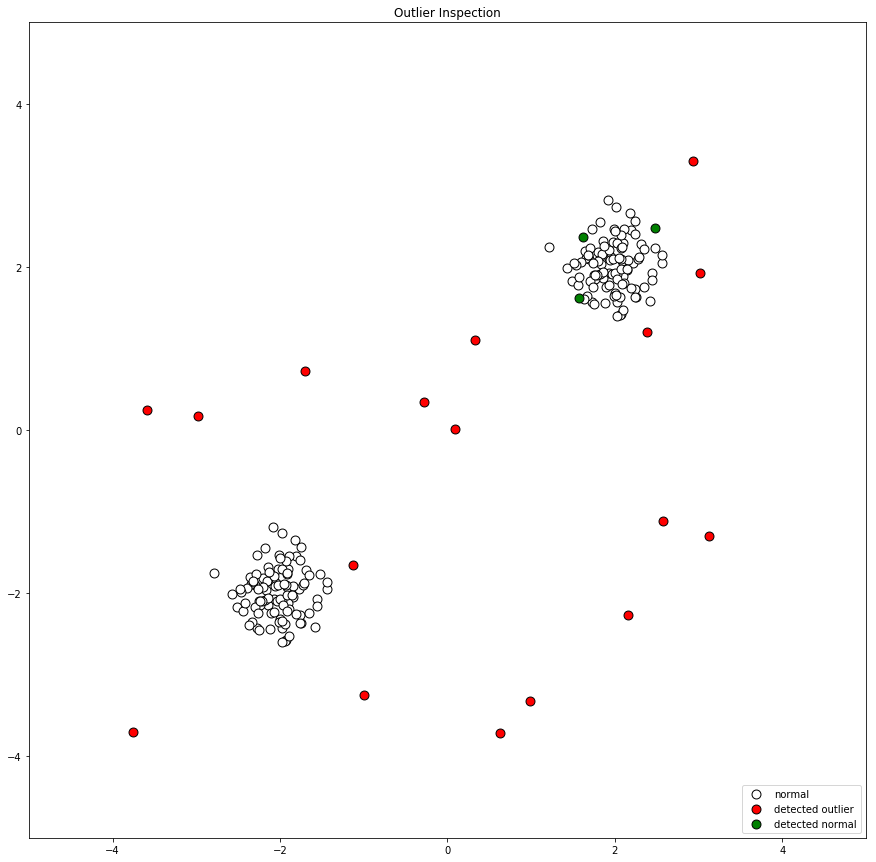

In [10]:
plt.figure(figsize=(15, 15))

plt.title('Outlier Inspection')

# plotting normals in white
p1 = plt.scatter(normal.x1, normal.x2, c='white', s=20*4, edgecolor='k')

# plotting outliers as red
# if red is in a cluster, then it was incorrectly classsified
p2 = plt.scatter(
    outliers.loc[outliers.y == -1, ['x1']],
    outliers.loc[outliers.y == -1, ['x2']],
    c='red', s=20*4, edgecolor='k'
)

# detected normal green
p3 = plt.scatter(
    outliers.loc[outliers.y == 1, ['x1']],
    outliers.loc[outliers.y == 1, ['x2']],
    c='green', s=20*4, edgecolor='k'
)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([p1, p2, p3], ['normal', 'detected outlier', 'detected normal'], loc='lower right')

### Saving the plot

In [9]:
plt.savefig('outlier_inspection.png', dpi=300)